1. Cykl Eulera

$def.$ Cykl Eulera w grafie $G$, to taki cykl, który przez każdą krawędź $G$ przechodzi dokładnie raz.

$tw.$ Graf nieskierowany i spójny posiada cykl Eulera $\iff$ każdy wierzchołek ma parzysty stopień.

Propozycja algorytmu:
 - wykonujemy DFS, ale po drodzie 'usuwamy' krawędzie, po których przeszliśmy
 - do danego wierzchołka możemy wejść dowolną liczbę razy
 - po przetworzeniu wierzchołka dopisujemy go na początku tworzonego cyklu


Złożoność $O(V+E)$ lub $O(V^2)$
</br>-> łatwo wpaść w $O(V^2 + VE)$ lub $O(V^3)$, aby tego uniknąć należy mieć "wskaźnik" do ostatniego wybranego sąsiada, w innym wypadku, każdy wybór sąsiada ma złożoność $O(n)$

In [1]:
def EulerCircuit(G,s):
    n=len(G)
    lastEdge=[[False for _ in range(n)] for _ in range(n)]
    Euler=[]
    def DFSVisit(G,v):
        nonlocal lastEdge, Euler
        for u in G[v]:
            if not lastEdge[v][u]:
                lastEdge[v][u],lastEdge[u][v]=True,True
                DFSVisit(G,u)
        Euler.append(v)
    DFSVisit(G,s)
    return Euler

G=[[1,2],[0,2],[0,1,3,4],[2,4],[2,3]]

print(EulerCircuit(G,0))
# Działa, ale z macierzą pomocniczą? sus

[0, 2, 4, 3, 2, 1, 0]


2. Cykl Hamiltona

$def.$ Cykl Hamiltona, to cykl prosty (niepowtarzający wierzchołków), który odwiedza każdy wierzchołek dokładnie raz.

Propozycja Algorytmu: 
 - Brute-force - sprawdza $O(V!)$ możliwości. Nie da się wiele lepiej, bo rozpoznawanie czy graf ma cykl Hamiltona jest problemem NP-zupełnym

3. Silnie Spójne składowe w grafie skierowanym

$def.$ Niech $G=(V,E)$ będzie pewnym grafiem skierowanym. </br>
Mówimy, że $u,v \in V $ należą do tej samej silnie spójniej składowej jeśli istnieje ścieżka z $u$ do $v$ i $v$ do $u$

Graf składający się z silnie spójnych składowych jest DAGiem, inaczej, byłby po prostu jedną spójną składową 

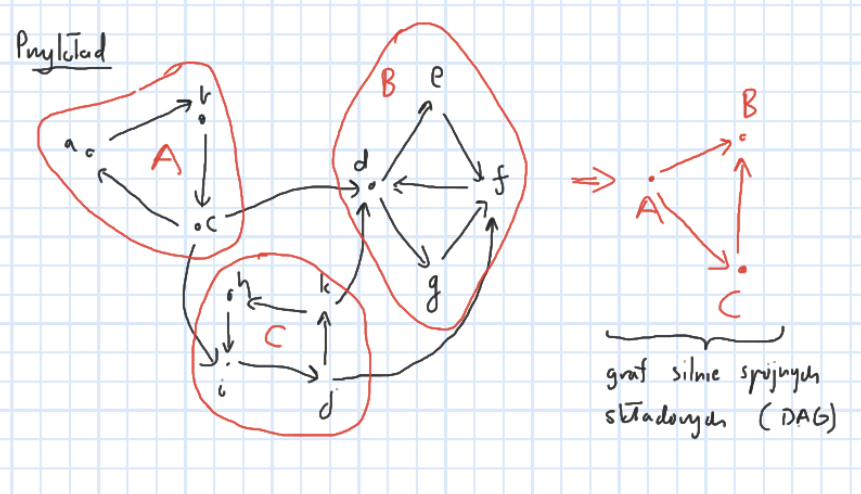


Propozycja algorytmu:
 - wykonujemy DFS na $G$, zapisując czasy przetworzenia   
 - odwracamy kierunek wszystkich krawędzi 
 - wykonujemy DFS, wybierając startowe wierzchołki w kolejności malejących względem czasu przetworzenia, wierzchołki odwiedzone w danym DFSVisit tworzą silnie spójną składową


In [138]:
def time(G):
    
    n=len(G)
    visited=[False for _ in range(n)]
    time_tab=[0 for _ in range(n)]
    t=n-1
    
    def dfsVisit(G,u):
        nonlocal visited,time_tab,t
        visited[u]=True
        for v in G[u]:
            if not visited[v]:
                dfsVisit(G,v)
        time_tab[t]=u
        t-=1
    
    for i in range(n):
        if not visited[i]:
            dfsVisit(G,i)
        
    return time_tab

def reverse_edges(G):
    
    n=len(G)
    visited=[False for _ in range(n)]
    A=[[] for _ in range(n)]
    
    def dfsVisit(G,u):
        nonlocal visited,A
        visited[u]=True
        for v in G[u]:
            A[v].append(u)
            if not visited[v]:
                dfsVisit(G,v)
                
    for i in range(n):
        if not visited[i]:
            dfsVisit(G,i)

    return A

def strong_connected_components(G):
    
    n=len(G)
    A=reverse_edges(G)
    time_tab=time(G)
    visited=[False for _ in range(n)]
    out=[]
    def dfsVisit(G,u):
        nonlocal visited,comp
        visited[u]=True
        # print(u)
        for v in A[u]:
            if not visited[v]:
                dfsVisit(G,v)
        comp.append(u)
        
    for v in time_tab:
        if not visited[v]:
            comp=[]
            dfsVisit(A,v)
            out.append(comp)
            
    return out

def s_graph(G):
    pass

G=[[1],[2],[0,3,8],[4,6],[5],[3],[5],[8],[9],[10,5],[7,3]]
G2=[[2, 3], [0], [1], [4], []]

print(strong_connected_components(G))
print(strong_connected_components(G2))

[[1, 2, 0], [9, 10, 7, 8], [4, 6, 5, 3]]
[[2, 1, 0], [3], [4]]



4. Znajdowanie mostów w grafach nieskierowanych

$def.$ Most, to krawędź $e$ w grafie nieskierowanym $G$, jeśli usunięcie jej rozspójnia graf

$tw.$ Krawędź $e$ jest mostem $\iff$ nie leży na żadnym cyklu prostym w grafie

$dow.:$
 - $e$ jest mostem $\Rightarrow$ nie leży na cyklu
 - $e$ nie leży na żadnym cyklu $\Rightarrow$ jest mostem

Algorytm:
 - wykonujemy DFS, dla  każdego $v$ zapisz jego czas odwiedzenia $d(v)$   
 - dla każdego $v$ oblicz $low(v) = min(d(v), d(u), min(low(w)))$ min z $v$ jest krawędź wsteczna do $u$, $w$ to dziecko $v$ w drzewie DFS
 - Mosty to krawędzie ${v,p(v)}$, takie gdzie czas $d(v) = low(v)$



In [ ]:
def low(v,u,d,parent,):
    pass

def bridges(G):
    n=len(G)
    d=[-1 for _ in range(n)]
    